<a href="https://colab.research.google.com/github/PhilippeJacques/Book-Rating/blob/Develop-Branch/PhilippeBookPredVersion5-3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Library Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from datetime import datetime
import numpy as np
import seaborn as sns
import scipy as sc
import statsmodels.api as sm

#Data Cleaning

On opening the dataset with txt format, we notice a last supplemented column called unamed with NAN entries and we had commas separating many coauthors of the same book with risks of creating new columns, to fix this problem, we removed the commas separating co-authors and this was sufficient to remove the unamed column too.

We will start by importing the dataset into a pandas dataframe and remove those parameters which do not match the proper structure

We will remove all data having ratings count equal to zero as the rating count is our most leading feature for the decision process.

In [3]:
warnings.filterwarnings("ignore")
df = pd.read_csv(r"books.csv",sep=",", error_bad_lines=False,index_col="bookID")
df = df[df.ratings_count != 0]

Skipping line 3350: expected 12 fields, saw 13
Skipping line 4704: expected 12 fields, saw 13
Skipping line 5879: expected 12 fields, saw 13
Skipping line 8981: expected 12 fields, saw 13



In order to filter the num_pages column, will rename as accessing it through its current name gives me an error

After these actions which will for sure modify the data, we have to check what the data looks like now

In [4]:
df.head(10)

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic
9,"Unauthorized Harry Potter Book Seven News: ""Ha...",W. Frederick Zimmerman,3.74,0976540606,9780976540601,en-US,152,19,1,4/26/2005,Nimble Books
10,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,4.73,0439827604,9780439827607,eng,3342,28242,808,9/12/2005,Scholastic
12,The Ultimate Hitchhiker's Guide: Five Complete...,Douglas Adams,4.38,0517226952,9780517226957,eng,815,3628,254,11/1/2005,Gramercy Books
13,The Ultimate Hitchhiker's Guide to the Galaxy ...,Douglas Adams,4.38,0345453743,9780345453747,eng,815,249558,4080,4/30/2002,Del Rey Books


 We will also remove books with no pages, that is number of pages equal zero for a book is by definition its content and it makes no sense to have a book without it.

First we list the column names for error-proof selection

In [5]:
cf = list(df.columns)
print(cf)

['title', 'authors', 'average_rating', 'isbn', 'isbn13', 'language_code', '  num_pages', 'ratings_count', 'text_reviews_count', 'publication_date', 'publisher']


We notice that num_pages has too much spaces at the beginning which we have to trim before appropriate selection, we will do the cleaning for all columns just in case.

In [6]:
df.columns = df.columns.str.replace(" ","")

Now we remove all books with num_pages equal to zero meaning that they have no content

In [7]:
df = df[df.num_pages != 0]
df.head(10)

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic
9,"Unauthorized Harry Potter Book Seven News: ""Ha...",W. Frederick Zimmerman,3.74,0976540606,9780976540601,en-US,152,19,1,4/26/2005,Nimble Books
10,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,4.73,0439827604,9780439827607,eng,3342,28242,808,9/12/2005,Scholastic
12,The Ultimate Hitchhiker's Guide: Five Complete...,Douglas Adams,4.38,0517226952,9780517226957,eng,815,3628,254,11/1/2005,Gramercy Books
13,The Ultimate Hitchhiker's Guide to the Galaxy ...,Douglas Adams,4.38,0345453743,9780345453747,eng,815,249558,4080,4/30/2002,Del Rey Books


### Remarks :

The publication_date is arranged in month-day-year terms and the average_rating, num_pages,text_reviews_count, isbn and isbn13 are all in numerical values while the rest are in string values.

# Feature Engineering

The most interesting features here include the average_rating, num_pages, ratings_count, text_reviews_count. We have to draw a correlation plot, to determine the most appropriate feature

<function matplotlib.pyplot.show(close=None, block=None)>

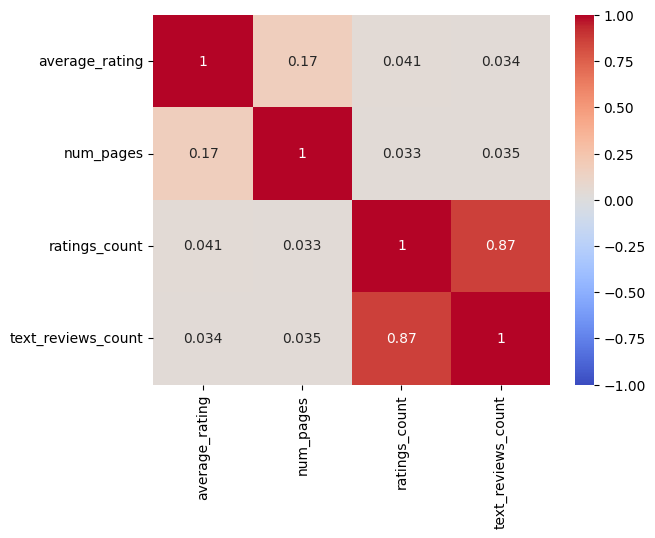

In [8]:
df_corr = df[["average_rating", "num_pages","ratings_count", "text_reviews_count"]]
corr = df_corr.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.show

From the heat map we can conclude that the num_pages, ratings_count and text_reviews_count are not strongly correlated to the average_rating variable. In this case we need some data processing to create a stronger correlation.
Text_reviews_count is highly correlated to ratings_count. To better understand the variety in those correlation we will need to create a scatter plot.

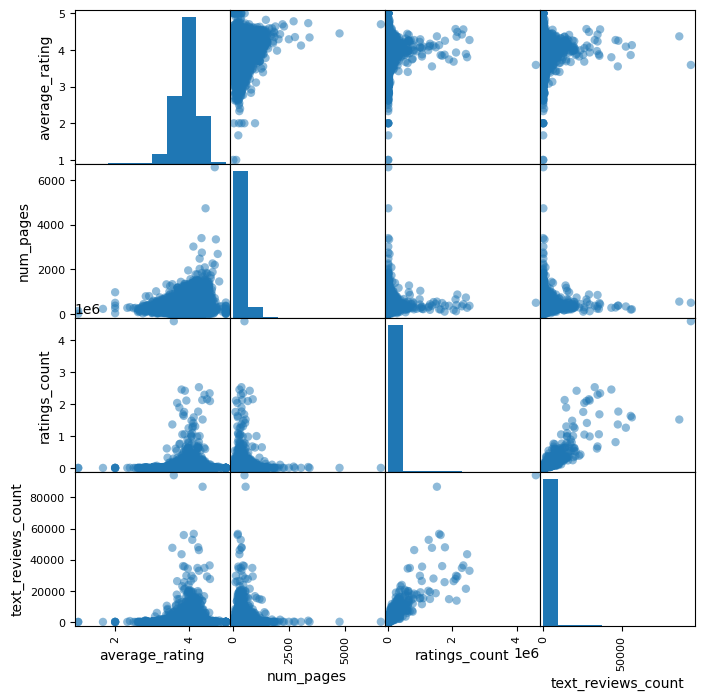

In [9]:
pd.plotting.scatter_matrix(df_corr, figsize=(8,8), marker="o")
plt.show()

From this scatter plot we can note that the plot correlating tex_review_count to average_rating is curve-like, exponential to some degree, so a log function could create a greater correlation between these two parameters and straighten the curve. But the log function is not an optimal solution here because on observation, we see that for very high average_rating, that is when the average_rating gets to 5, the text_review_count tends to get lower and decreases to zero.

The same observation as above can be seen occuring between ratings_count and average rating parameters.

The parameter num_pages, shows more of a linear corelation, firstly, with text_reviews_count, that is num_pages is indirectly prportional to text_review_count and ratings count, for for lower values of num_pages we experience higher text_review_count and ratings_count.

After analysing the way these parameters correlate to each other, we will now analyse each parameter separately, by analysing them using a boxplot.

<function matplotlib.pyplot.show(close=None, block=None)>

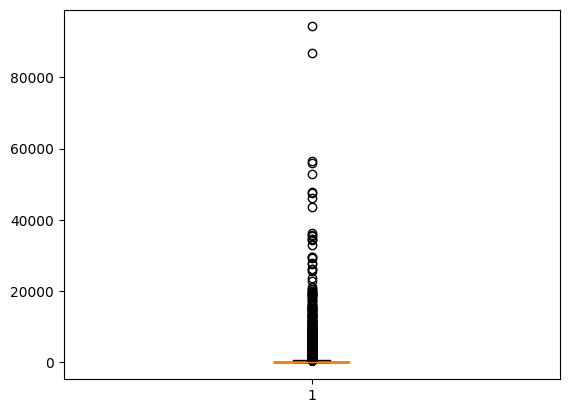

In [10]:
plt.boxplot(df_corr["text_reviews_count"])
plt.show

We can notice a positive skewness here, meaning the median is lower than the mean.

<function matplotlib.pyplot.show(close=None, block=None)>

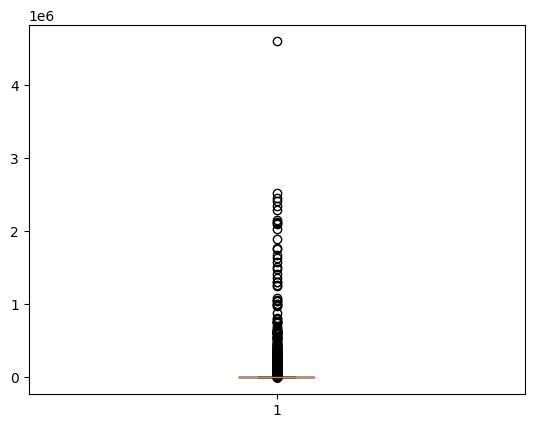

In [11]:
plt.boxplot(df_corr["ratings_count"])
plt.show

We notice the same pattern here as in the text reviews count, the median is lower than the mean, this is because, if a bount has a good number of rating and review, many more readers are likely to stumble upon the book and rate it, thereby, leading to a larger number of reviews and ratings, it is a cycle.

<function matplotlib.pyplot.show(close=None, block=None)>

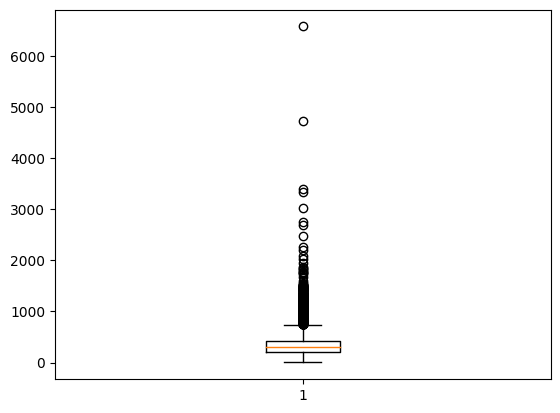

In [12]:
plt.boxplot(df_corr["num_pages"])
plt.show

We can notice in the num pages box plot, that the greater number of books have a couple of hundred pages,and some books have from a thousand to two thousand pages.

<function matplotlib.pyplot.show(close=None, block=None)>

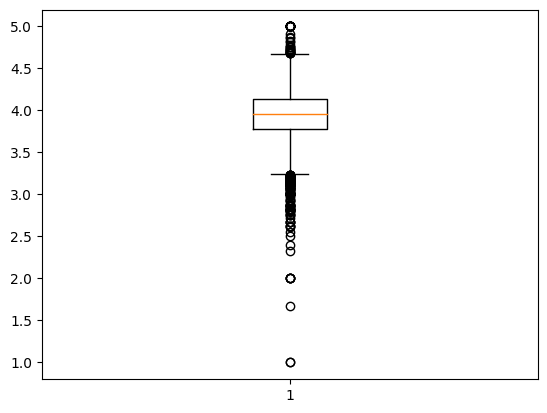

In [13]:
plt.boxplot(df_corr["average_rating"])
plt.show

here we can notice a normal distribution, with a mean just below four. We also notice more spaces between the lower end, 1, and the mean than between the higher end 5 and the mean.

We will proceed with the date, we have to convert it to pandas datetime format for easier processing, the books whose date will not be able to be converted will be removed from the data frame, for the most likely reason is missreading of the data or incorrect data.

In [14]:
df["publication_date"] = pd.to_datetime(df["publication_date"], errors='coerce')
df = df.dropna();

We will now create a categorical variable for the languages because we notice the problem here in which there are not many books for a particular language, the categorical variable will tell us if the book is in english or not. Its values will be 1 for english or 0 for not english.

After creating the language variable, we will drop the language column for it is not longer necessary.

In [15]:
df["is_eng"] = df["language_code"].str.contains('eng|en-').astype(int)
df.drop(columns=["language_code"]);

As audiobooks are always published after the paper or e-book format of a book, one can assume that for each audiobook, there is a text based version.These audiobooks are books with less than 30 pages, or books published by a publisher with "Audio" in their name. We will remove those books from our dataset.

In [16]:
def audiobook(location):
    if location['num_pages'] < 30 or "audio" in location["publisher"]:
        return 1
    else:
        return 0

df["audio"] = df.apply(lambda location: audiobook(location), axis=1)
df = df[df.audio == 0]

We will then remove the isbn of the book, for it has no good correlation with our findings.

In [17]:
df = df.drop(columns=['isbn', 'isbn13'])


Then we have to create new variables with much more in-depth detailed information about our dataset. First, we find how long it is since the book was published, based on the assumed date of extraction and the publication_date.

In [18]:
specific_date_str = "2022-12-31" #yyyy-mm-dd
specific_date = pd.to_datetime(specific_date_str)
# Find time since the books were published
df["days_since_published"] = df["publication_date"].apply(lambda x: (specific_date - x).days)
df["years_since_published"] = df.days_since_published / 365.24
df["log_days_since_published"] = np.clip(np.log(df.days_since_published), 0, np.inf)

In [19]:
df["log_num_pages"] = np.log(df.num_pages)
df["log_r_count"] = np.log(df.ratings_count)
df["log_t_count"] = np.clip(np.log(df.text_reviews_count), 0, np.inf)

From the above information, we are able to find the average frequency of ratings and reviews.

In [20]:
# Create variable that is rating/text_review per day/year/log_day (rating/review density)
df["r_count_per_day"] = df.ratings_count / df.days_since_published
df["t_count_per_day"] = df.text_reviews_count / df.days_since_published
df["r_count_per_year"] = df.ratings_count / df.years_since_published
df["t_count_per_year"] = df.text_reviews_count / df.years_since_published
df["r_count_per_log_day"] = df.ratings_count / df.log_days_since_published
df["t_count_per_log_day"] = df.text_reviews_count / df.log_days_since_published

In [21]:
df["log_r_count_per_day"] = df.log_r_count / df.days_since_published
df["log_t_count_per_day"] = df.log_t_count / df.days_since_published
df["log_r_count_per_year"] = df.log_r_count / df.years_since_published
df["log_t_count_per_year"] = df.log_t_count / df.years_since_published
df["log_r_count_per_log_day"] = df.log_r_count / df.log_days_since_published
df["log_t_count_per_log_day"] = df.log_t_count / df.log_days_since_published

We can also find the average rating_count and text_reviews_count per page of each book.
We do also find different combinations for log values of the generated variables we just mentioned.

In [22]:
df["ratings_count_per_num_pages"] = df.ratings_count / df.num_pages
df["text_reviews_count_per_num_pages"] = df.text_reviews_count / df.num_pages
df["ratings_count_per_log_num_pages"] = df.ratings_count / df.log_num_pages
df["text_reviews_count_per_log_num_pages"] = df.text_reviews_count / df.log_num_pages
df["log_r_count_per_num_pages"] = df.log_r_count / df.num_pages
df["log_t_count_per_num_pages"] = df.log_t_count / df.num_pages
df["log_r_count_per_log_num_pages"] = df.log_r_count / df.log_num_pages
df["log_t_count_per_log_num_pages"] = df.log_t_count / df.log_num_pages

We will also remove all string values for we wish to evaluate a books rating which is generally expressed in numbers, so no need for those string values, they do not influence our predictions.

In [23]:
df = df.drop(columns=['title', 'authors', 'language_code', 'publication_date', 'publisher', 'audio'])


We now do a check to see if all our remaining values are numeric, and if there are some books with non-numeric values in the dataframe as of now, these books will be removed from the dataframe.

In [24]:
df = df.apply(pd.to_numeric, errors='coerce').dropna()

We will now create a correlation plot to get an understanding of our newly added variables.

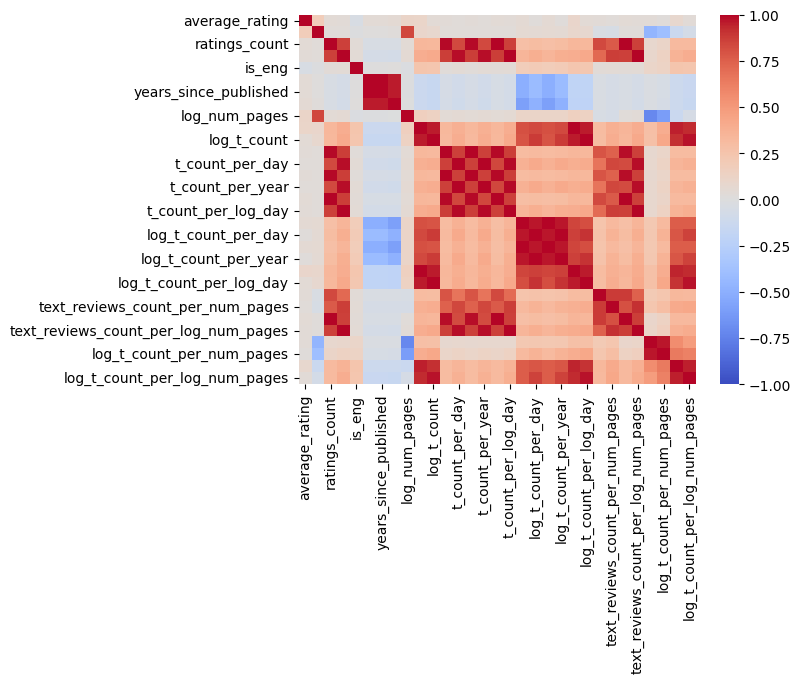

In [25]:
corr = df.corr()
sns.heatmap(corr, annot=False, cmap="coolwarm", vmin=-1, vmax=1)
plt.show()

Here we cannot read the values clearly, so we will split the graph into three equals each containing averating rating for it is our purpose of study here.

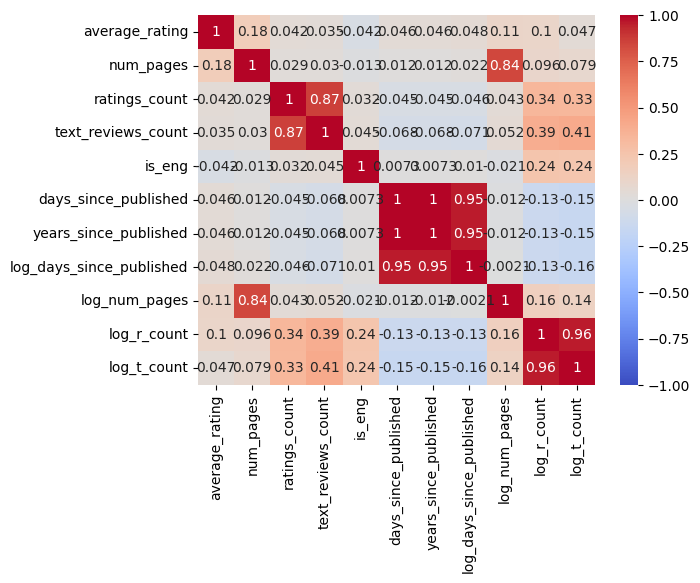

In [26]:
c1 = df.iloc[:, 0:11]
corr = c1.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.show()

The first part

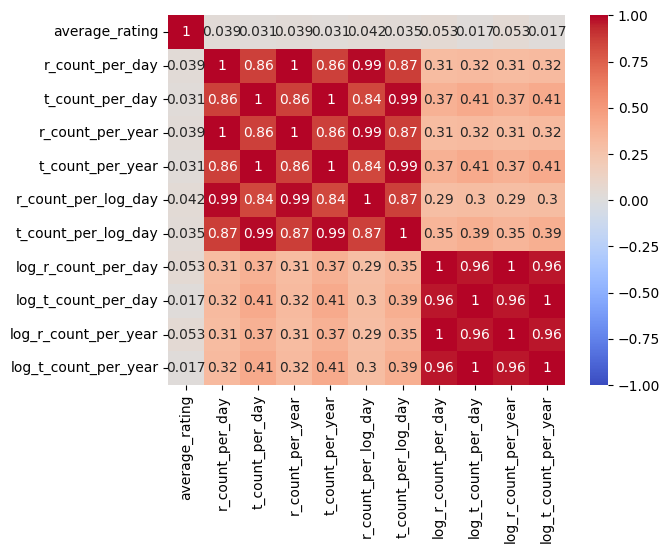

In [27]:
c2 = pd.concat([df.iloc[:, 0], df.iloc[:, 11:21]], axis=1)
corr = c2.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.show()

the second part

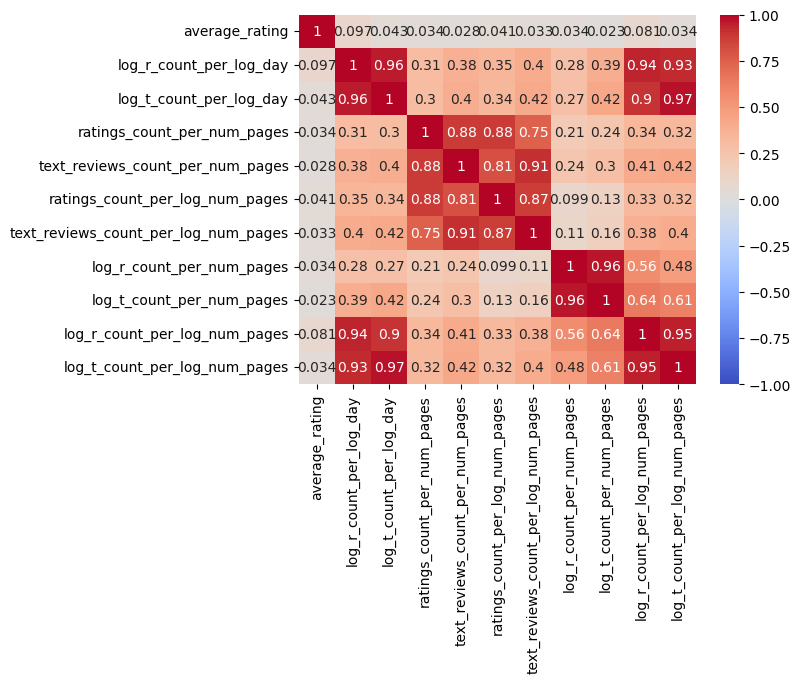

In [28]:
c3 = pd.concat([df.iloc[:, 0], df.iloc[:, 21:df.shape[1]]], axis=1)
corr = c3.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.show()

The last part, as we can see, there are now many highly correlated variables, although still none of them are highly correlated with the response variable. Even though, we can see that we have created some variables that are more correlated with the response variable than some of those we had initially.

#MODEL TRAINING AND TESTING

We can for example see that log_num_pages and log_r_count_per_log_day, some of our new variables has a higher correlation than some of the old ones.
We will now find out what model is the best and the most stable by running it through a a series of random distributions of training- and test data.

The
 scores for each model will be stored in a list that will be analysed afterwards.

After finding the model with the best
, we will take a closer look at that model and see if there are some insignificant explanatory variables that can be removed.

We can already assume that this will be the case, as we can see from the correlation plot that some of the variables we created by transforming other variables are highly correlated with each other, but not that correlated with the response variable.

We start by defining our models:

In [29]:
def linmod(X_train, X_test, y_train, y_test):
    # Linear regression model
    # Create a linear regression model and limit predicted values to between 0 and 5
    model = LinearRegression()
    model.fit(X_train, y_train)
    # Predict the target values for the test data
    y_pred = np.clip(model.predict(X_test), 1, 5)
    # Get the R^2 value
    r2 = r2_score(y_test, y_pred)

    mse = mean_squared_error(y_test, y_pred)
    return r2, mse

def polmod(X_train, X_test, y_train, y_test):
    # Polynomial regression model
    # Create a polynomial regression model and limit predicted values to between 0 and 5
    poly = PolynomialFeatures(degree=2)
    X_train = poly.fit_transform(X_train)
    X_test = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_train, y_train)
    # Predict the target values for the test data
    y_pred = np.clip(model.predict(X_test), 1, 5)
    # Get the R^2 value for the test data
    r2 = r2_score(y_test, y_pred)

    mse = mean_squared_error(y_test, y_pred)
    return r2, mse

def svrmod(X_train, X_test, y_train, y_test):
    # Fit SVR model
    model = SVR(kernel='rbf')
    model.fit(X_train, y_train)
    # Predict the target values for the test data
    y_pred = np.clip(model.predict(X_test), 1, 5)
    # Get R^2 value
    r2 = r2_score(y_test, y_pred)

    mse = mean_squared_error(y_test, y_pred)
    return r2, mse

def rafmod(X_train, X_test, y_train, y_test):
    # Fit random forest regression model
    model = RandomForestRegressor(n_estimators=100)
    model.fit(X_train, y_train)
    # Predict on test data and limit predicted values to between 1 and 5
    y_pred = np.clip(model.predict(X_test), 1, 5)
    # Get R^2 value
    r2 = r2_score(y_test, y_pred)

    mse = mean_squared_error(y_test, y_pred)
    return r2, mse


def ridmod(X_train, X_test, y_train, y_test):
    # Instantiate the Ridge model
    model = Ridge(alpha=0.000001)
    # Fit the Ridge model to the training data
    model.fit(X_train, y_train)
    # Use the Ridge model to make predictions on the test data
    y_pred = np.clip(model.predict(X_test), 1, 5)
    # Get R^2 value
    r2 = r2_score(y_test, y_pred)

    mse = mean_squared_error(y_test, y_pred)
    return r2, mse


def lasmod(X_train, X_test, y_train, y_test):
    # Instantiate the Lasso model
    model = Lasso(alpha=0.000001)
    # Fit the Lasso model to the training data
    model.fit(X_train, y_train)
    # Use the Lasso model to make predictions on the test data
    y_pred = np.clip(model.predict(X_test), 1, 5)
    # Get R^2 value
    r2 = r2_score(y_test, y_pred)

    mse = mean_squared_error(y_test, y_pred)
    return r2, mse


def baymod(X_train, X_test, y_train, y_test):
    # Create and fit the Bayesian Ridge model
    model = BayesianRidge()
    model.fit(X_train, y_train)
    # Use the bayesian ridge model to make predictions on the test data
    y_pred = np.clip(model.predict(X_test), 1, 5)
    # Get R^2 value
    r2 = r2_score(y_test, y_pred)

    mse = mean_squared_error(y_test, y_pred)
    return r2, mse

def lgbmod(X_train, X_test, y_train, y_test):
    # Train the LightGBM model
    model = LGBMRegressor(learning_rate=0.07, n_estimators=100)
    model.fit(X_train, y_train)
    # Use the LightGBM model to make predictions on the test data
    y_pred = np.clip(model.predict(X_test), 1, 5)
    # Get R^2 value
    r2 = r2_score(y_test, y_pred)

    mse = mean_squared_error(y_test, y_pred)
    return r2, mse

We will distinguish the training and response features and import necessary libraries

In [30]:
X = df.iloc[:, 1:df.shape[1]]
y = df['average_rating']

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso, BayesianRidge
from lightgbm import LGBMRegressor

Next we define the train and test of all the previous models

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)
print(linmod(X_train, X_test, y_train, y_test))
print(polmod(X_train, X_test, y_train, y_test))
print(svrmod(X_train, X_test, y_train, y_test))
print(rafmod(X_train, X_test, y_train, y_test))
print(ridmod(X_train, X_test, y_train, y_test))
print(lasmod(X_train, X_test, y_train, y_test))
print(baymod(X_train, X_test, y_train, y_test))
print(lgbmod(X_train, X_test, y_train, y_test))

(0.0931906469759024, 0.07561791589101508)
(0.06523433174832727, 0.0779491647764082)
(0.013684871921736952, 0.08224782215614829)
(0.0633013004287688, 0.07811035830540038)
(0.09319017076084835, 0.07561795560210738)
(0.09183575538949651, 0.0757308989316957)
(0.08508034328950398, 0.0762942259224053)
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002979 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7397
[LightGBM] [Info] Number of data points in the train set: 8592, number of used features: 30
[LightGBM] [Info] Start training from score 3.942029
(0.10211357472120908, 0.07487384196026431)


We can see that polynominal model, svr model and the random forest model are inferior to the other , so we will remove them and focus on the other models.



We will look for their **R²** Values


In [32]:
linmod_rsq_list = []
ridmod_rsq_list = []
lasmod_rsq_list = []
baymod_rsq_list = []
lgbmod_rsq_list = []

linmod_mse_list = []
ridmod_mse_list = []
lasmod_mse_list = []
baymod_mse_list = []
lgbmod_mse_list = []

In [33]:
for i in range(1,31):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = i)
    rsq, mse = linmod(X_train, X_test, y_train, y_test)
    linmod_rsq_list.append(rsq)
    linmod_mse_list.append(mse)
    rsq, mse = ridmod(X_train, X_test, y_train, y_test)
    ridmod_rsq_list.append(rsq)
    ridmod_mse_list.append(mse)
    rsq, mse = lasmod(X_train, X_test, y_train, y_test)
    lasmod_rsq_list.append(rsq)
    lasmod_mse_list.append(mse)
    rsq, mse = baymod(X_train, X_test, y_train, y_test)
    baymod_rsq_list.append(rsq)
    baymod_mse_list.append(mse)
    rsq, mse = lgbmod(X_train, X_test, y_train, y_test)
    lgbmod_rsq_list.append(rsq)
    lgbmod_mse_list.append(mse)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002565 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7397
[LightGBM] [Info] Number of data points in the train set: 8592, number of used features: 30
[LightGBM] [Info] Start training from score 3.942029
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004630 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7397
[LightGBM] [Info] Number of data points in the train set: 8592, number of used features: 30
[LightGBM] [Info] Start training from score 3.942870
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003456 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7397
[LightGBM] [Info] Number of data points in the tr

For the **R²** we will start by looking at the mean values

In [34]:
print(np.mean(linmod_rsq_list))
print(np.mean(ridmod_rsq_list))
print(np.mean(lasmod_rsq_list))
print(np.mean(baymod_rsq_list))
print(np.mean(lgbmod_rsq_list))

0.0887803414515311
0.08878075035675144
0.08972693819817136
0.08429784128852515
0.09926534061732838


Then the **R²** values next

In [35]:
print(np.mean(linmod_mse_list))
print(np.mean(ridmod_mse_list))
print(np.mean(lasmod_mse_list))
print(np.mean(baymod_mse_list))
print(np.mean(lgbmod_mse_list))

0.07997637127941218
0.07997633477899166
0.07989276222436086
0.08037140032201028
0.07909268542508259


LightGBM model has the highest **R²** value

we look at it for the latest random_state distribution seed for the training data and test data distribution. This can be done as we don't know how this seed compares with the other ones for this model, so our analysis of the model in this case is unbiased.

In [36]:
# Calculate p-values using statsmodels
X_with_constant = sm.add_constant(X_train)
ols_model = sm.OLS(y_train, X_with_constant).fit()
p_values = ols_model.summary2().tables[1]['P>|t|']


# Sort p-values from largest to smallest
sorted_p_values = p_values.sort_values(ascending=False)

print("P-values sorted from largest to smallest:")
print(sorted_p_values)

P-values sorted from largest to smallest:
log_t_count_per_year                    9.977301e-01
log_t_count_per_day                     9.977301e-01
log_num_pages                           9.601149e-01
days_since_published                    6.968271e-01
ratings_count_per_num_pages             6.874249e-01
log_r_count_per_log_num_pages           6.272965e-01
ratings_count                           6.183681e-01
log_r_count_per_num_pages               6.117183e-01
years_since_published                   5.811412e-01
ratings_count_per_log_num_pages         5.774944e-01
log_r_count_per_year                    5.087158e-01
log_r_count_per_day                     5.087158e-01
r_count_per_log_day                     4.917627e-01
log_t_count_per_num_pages               4.721478e-01
text_reviews_count_per_num_pages        4.560397e-01
text_reviews_count_per_log_num_pages    3.948316e-01
t_count_per_year                        3.778037e-01
t_count_per_day                         3.777985e-01
log_

We see that ratings_count_per_num_pages has the highest p-value, meaning it is the least significant variable for our model. We will nor try to simplify the model until all variables have **a significance level of 90%**

As the variables are correlated with each other to some degree, we can only remove one at a time as the p-values will potentially change for the other variables when one variable is removed.

In [37]:
X = X.drop(['ratings_count_per_num_pages'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = i)

rsq, mse = lgbmod(X_train, X_test, y_train, y_test)
print(f"R^2 : {rsq}")
print(f"MSE : {mse}")

# Calculate p-values using statsmodels
X_with_constant = sm.add_constant(X_train)
ols_model = sm.OLS(y_train, X_with_constant).fit()
p_values = ols_model.summary2().tables[1]['P>|t|']


# Sort p-values from largest to smallest
sorted_p_values = p_values.sort_values(ascending=False)

print("P-values sorted from largest to smallest:")
print(sorted_p_values)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002727 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7142
[LightGBM] [Info] Number of data points in the train set: 8592, number of used features: 29
[LightGBM] [Info] Start training from score 3.943983
R^2 : 0.07779959317766916
MSE : 0.08091509270910256
P-values sorted from largest to smallest:
log_t_count_per_day                     9.966971e-01
log_t_count_per_year                    9.966971e-01
log_num_pages                           9.474375e-01
days_since_published                    7.033585e-01
years_since_published                   6.605667e-01
log_r_count_per_log_num_pages           6.441218e-01
ratings_count                           5.868261e-01
log_r_count_per_num_pages               5.707548e-01
r_count_per_log_day                     5.146427e-01
log_t_count_per_num_pages               5.103270e-01
log_r_count_per_year            

We continue the procedure of removing the variable with the highest p-value and then re-calculating the p-values



In [38]:
X = X.drop(['log_r_count_per_log_num_pages'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = i)

rsq, mse = lgbmod(X_train, X_test, y_train, y_test)
print(f"R^2 : {rsq}")
print(f"MSE : {mse}")

# Calculate p-values using statsmodels
X_with_constant = sm.add_constant(X_train)
ols_model = sm.OLS(y_train, X_with_constant).fit()
p_values = ols_model.summary2().tables[1]['P>|t|']


# Sort p-values from largest to smallest
sorted_p_values = p_values.sort_values(ascending=False)

print("P-values sorted from largest to smallest:")
print(sorted_p_values)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002725 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6887
[LightGBM] [Info] Number of data points in the train set: 8592, number of used features: 28
[LightGBM] [Info] Start training from score 3.943983
R^2 : 0.07659357975338554
MSE : 0.08102090993420072
P-values sorted from largest to smallest:
log_t_count_per_year                    9.911709e-01
log_t_count_per_day                     9.911709e-01
log_num_pages                           9.368131e-01
years_since_published                   7.409083e-01
days_since_published                    7.043389e-01
log_t_count_per_num_pages               6.120292e-01
ratings_count                           5.826213e-01
ratings_count_per_log_num_pages         5.288175e-01
r_count_per_log_day                     5.123060e-01
log_r_count_per_year                    5.055634e-01
log_r_count_per_day             

Here, we will continue by removing the log_r_count_per_day

In [39]:
X = X.drop(['log_r_count_per_day'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = i)

rsq, mse = lgbmod(X_train, X_test, y_train, y_test)
print(f"R^2 : {rsq}")
print(f"MSE : {mse}")

# Calculate p-values using statsmodels
X_with_constant = sm.add_constant(X_train)
ols_model = sm.OLS(y_train, X_with_constant).fit()
p_values = ols_model.summary2().tables[1]['P>|t|']


# Sort p-values from largest to smallest
sorted_p_values = p_values.sort_values(ascending=False)

print("P-values sorted from largest to smallest:")
print(sorted_p_values)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002492 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6632
[LightGBM] [Info] Number of data points in the train set: 8592, number of used features: 27
[LightGBM] [Info] Start training from score 3.943983
R^2 : 0.07659357975338554
MSE : 0.08102090993420072
P-values sorted from largest to smallest:
log_t_count_per_year                    9.911709e-01
log_t_count_per_day                     9.911709e-01
log_num_pages                           9.368131e-01
years_since_published                   7.487889e-01
days_since_published                    7.043388e-01
log_t_count_per_num_pages               6.120292e-01
ratings_count                           5.826213e-01
ratings_count_per_log_num_pages         5.288175e-01
r_count_per_log_day                     5.123060e-01
log_r_count_per_year                    5.055634e-01
t_count_per_day                 

We will remove days_since_published

In [40]:
X = X.drop(['days_since_published'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = i)

rsq, mse = lgbmod(X_train, X_test, y_train, y_test)
print(f"R^2 : {rsq}")
print(f"MSE : {mse}")

# Calculate p-values using statsmodels
X_with_constant = sm.add_constant(X_train)
ols_model = sm.OLS(y_train, X_with_constant).fit()
p_values = ols_model.summary2().tables[1]['P>|t|']


# Sort p-values from largest to smallest
sorted_p_values = p_values.sort_values(ascending=False)

print("P-values sorted from largest to smallest:")
print(sorted_p_values)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002474 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6377
[LightGBM] [Info] Number of data points in the train set: 8592, number of used features: 26
[LightGBM] [Info] Start training from score 3.943983
R^2 : 0.07659357975338554
MSE : 0.08102090993420072
P-values sorted from largest to smallest:
log_t_count_per_day                     9.911709e-01
log_t_count_per_year                    9.911709e-01
log_num_pages                           9.368131e-01
years_since_published                   7.043391e-01
log_t_count_per_num_pages               6.120292e-01
ratings_count                           5.826213e-01
ratings_count_per_log_num_pages         5.288175e-01
r_count_per_log_day                     5.123060e-01
log_r_count_per_year                    5.055634e-01
t_count_per_year                        3.740854e-01
t_count_per_day                 

we will now remove text_reviews_count_per_num_pages variable and proceed

In [41]:
X = X.drop(['text_reviews_count_per_num_pages'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = i)

rsq, mse = lgbmod(X_train, X_test, y_train, y_test)
print(f"R^2 : {rsq}")
print(f"MSE : {mse}")

# Calculate p-values using statsmodels
X_with_constant = sm.add_constant(X_train)
ols_model = sm.OLS(y_train, X_with_constant).fit()
p_values = ols_model.summary2().tables[1]['P>|t|']


# Sort p-values from largest to smallest
sorted_p_values = p_values.sort_values(ascending=False)

print("P-values sorted from largest to smallest:")
print(sorted_p_values)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002412 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6122
[LightGBM] [Info] Number of data points in the train set: 8592, number of used features: 25
[LightGBM] [Info] Start training from score 3.943983
R^2 : 0.07441548125131736
MSE : 0.0812120191995194
P-values sorted from largest to smallest:
log_t_count_per_year                    9.977695e-01
log_t_count_per_day                     9.977695e-01
log_num_pages                           9.036407e-01
log_t_count_per_num_pages               7.529790e-01
years_since_published                   6.992364e-01
ratings_count                           6.130462e-01
r_count_per_log_day                     5.234437e-01
log_r_count_per_year                    5.083963e-01
text_reviews_count_per_log_num_pages    4.943153e-01
t_count_per_day                         3.611834e-01
t_count_per_year                 

we will remove t_count_per_day and proceed

In [42]:
X = X.drop(['t_count_per_day'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = i)

rsq, mse = lgbmod(X_train, X_test, y_train, y_test)
print(f"R^2 : {rsq}")
print(f"MSE : {mse}")

# Calculate p-values using statsmodels
X_with_constant = sm.add_constant(X_train)
ols_model = sm.OLS(y_train, X_with_constant).fit()
p_values = ols_model.summary2().tables[1]['P>|t|']


# Sort p-values from largest to smallest
sorted_p_values = p_values.sort_values(ascending=False)

print("P-values sorted from largest to smallest:")
print(sorted_p_values)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003656 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5867
[LightGBM] [Info] Number of data points in the train set: 8592, number of used features: 24
[LightGBM] [Info] Start training from score 3.943983
R^2 : 0.07441548125131736
MSE : 0.0812120191995194
P-values sorted from largest to smallest:
log_t_count_per_day                     9.977695e-01
log_t_count_per_year                    9.977695e-01
log_num_pages                           9.036407e-01
log_t_count_per_num_pages               7.529790e-01
years_since_published                   6.992364e-01
ratings_count                           6.130462e-01
r_count_per_log_day                     5.234437e-01
log_r_count_per_year                    5.083963e-01
text_reviews_count_per_log_num_pages    4.943153e-01
t_count_per_year                        3.611828e-01
ratings_count_per_log_num_pages  

now we remove t_count_per_year and proceed again

In [43]:
X = X.drop(['t_count_per_year'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = i)

rsq, mse = lgbmod(X_train, X_test, y_train, y_test)
print(f"R^2 : {rsq}")
print(f"MSE : {mse}")

# Calculate p-values using statsmodels
X_with_constant = sm.add_constant(X_train)
ols_model = sm.OLS(y_train, X_with_constant).fit()
p_values = ols_model.summary2().tables[1]['P>|t|']


# Sort p-values from largest to smallest
sorted_p_values = p_values.sort_values(ascending=False)

print("P-values sorted from largest to smallest:")
print(sorted_p_values)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002041 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5612
[LightGBM] [Info] Number of data points in the train set: 8592, number of used features: 23
[LightGBM] [Info] Start training from score 3.943983
R^2 : 0.08213768348165318
MSE : 0.08053446288446732
P-values sorted from largest to smallest:
log_num_pages                           9.147910e-01
log_t_count_per_num_pages               7.592134e-01
years_since_published                   6.855651e-01
log_t_count_per_day                     6.401907e-01
log_t_count_per_year                    6.401907e-01
text_reviews_count_per_log_num_pages    5.796543e-01
ratings_count_per_log_num_pages         3.175945e-01
log_r_count_per_year                    2.955534e-01
ratings_count                           1.706570e-01
text_reviews_count                      1.462030e-01
t_count_per_log_day             

we will remove text_reviews_count_per_log_num_pages and proceed again

In [44]:
X = X.drop(['text_reviews_count_per_log_num_pages'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = i)

rsq, mse = lgbmod(X_train, X_test, y_train, y_test)
print(f"R^2 : {rsq}")
print(f"MSE : {mse}")

# Calculate p-values using statsmodels
X_with_constant = sm.add_constant(X_train)
ols_model = sm.OLS(y_train, X_with_constant).fit()
p_values = ols_model.summary2().tables[1]['P>|t|']


# Sort p-values from largest to smallest
sorted_p_values = p_values.sort_values(ascending=False)

print("P-values sorted from largest to smallest:")
print(sorted_p_values)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002007 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5357
[LightGBM] [Info] Number of data points in the train set: 8592, number of used features: 22
[LightGBM] [Info] Start training from score 3.943983
R^2 : 0.08241265894477312
MSE : 0.08051033617087397
P-values sorted from largest to smallest:
log_num_pages                      9.236588e-01
log_t_count_per_num_pages          7.739906e-01
years_since_published              6.869386e-01
log_t_count_per_year               6.468143e-01
log_t_count_per_day                6.468143e-01
log_r_count_per_year               3.004767e-01
ratings_count_per_log_num_pages    2.943747e-01
text_reviews_count                 1.786586e-01
ratings_count                      1.627250e-01
t_count_per_log_day                1.622672e-01
r_count_per_log_day                1.308234e-01
log_r_count_per_log_day           

we will remove log_r_count_per_num_pages variable and proceed

In [45]:
X = X.drop(['log_r_count_per_num_pages'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = i)

rsq, mse = lgbmod(X_train, X_test, y_train, y_test)
print(f"R^2 : {rsq}")
print(f"MSE : {mse}")

# Calculate p-values using statsmodels
X_with_constant = sm.add_constant(X_train)
ols_model = sm.OLS(y_train, X_with_constant).fit()
p_values = ols_model.summary2().tables[1]['P>|t|']


# Sort p-values from largest to smallest
sorted_p_values = p_values.sort_values(ascending=False)

print("P-values sorted from largest to smallest:")
print(sorted_p_values)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001875 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5102
[LightGBM] [Info] Number of data points in the train set: 8592, number of used features: 21
[LightGBM] [Info] Start training from score 3.943983
R^2 : 0.08815671454222607
MSE : 0.08000634507766283
P-values sorted from largest to smallest:
years_since_published              6.640825e-01
log_t_count_per_day                6.454583e-01
log_t_count_per_year               6.454583e-01
ratings_count_per_log_num_pages    3.878765e-01
log_r_count_per_year               2.996777e-01
text_reviews_count                 1.732833e-01
ratings_count                      1.655615e-01
t_count_per_log_day                1.568588e-01
r_count_per_log_day                1.352106e-01
log_r_count_per_log_day            8.256726e-02
log_r_count                        8.210667e-02
log_t_count_per_log_day           

we will proceed by removing the ratings_count_per_log_num_pages variable and proceeding

In [46]:
X = X.drop(['ratings_count_per_log_num_pages'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = i)

rsq, mse = lgbmod(X_train, X_test, y_train, y_test)
print(f"R^2 : {rsq}")
print(f"MSE : {mse}")

# Calculate p-values using statsmodels
X_with_constant = sm.add_constant(X_train)
ols_model = sm.OLS(y_train, X_with_constant).fit()
p_values = ols_model.summary2().tables[1]['P>|t|']


# Sort p-values from largest to smallest
sorted_p_values = p_values.sort_values(ascending=False)

print("P-values sorted from largest to smallest:")
print(sorted_p_values)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002136 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4847
[LightGBM] [Info] Number of data points in the train set: 8592, number of used features: 20
[LightGBM] [Info] Start training from score 3.943983
R^2 : 0.08286680836906746
MSE : 0.0804704884951424
P-values sorted from largest to smallest:
years_since_published            6.811656e-01
log_t_count_per_day              6.376837e-01
log_t_count_per_year             6.376837e-01
log_r_count_per_year             3.000483e-01
text_reviews_count               1.722130e-01
ratings_count                    1.713711e-01
t_count_per_log_day              1.561943e-01
r_count_per_log_day              1.496371e-01
log_r_count_per_log_day          8.384188e-02
log_r_count                      8.347104e-02
r_count_per_year                 4.906354e-02
r_count_per_day                  4.906145e-02
log_t_count

we will remove text_reviews_count variable and proceed

In [47]:
X = X.drop(['text_reviews_count'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = i)

rsq, mse = lgbmod(X_train, X_test, y_train, y_test)
print(f"R^2 : {rsq}")
print(f"MSE : {mse}")

# Calculate p-values using statsmodels
X_with_constant = sm.add_constant(X_train)
ols_model = sm.OLS(y_train, X_with_constant).fit()
p_values = ols_model.summary2().tables[1]['P>|t|']


# Sort p-values from largest to smallest
sorted_p_values = p_values.sort_values(ascending=False)

print("P-values sorted from largest to smallest:")
print(sorted_p_values)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001645 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4592
[LightGBM] [Info] Number of data points in the train set: 8592, number of used features: 19
[LightGBM] [Info] Start training from score 3.943983
R^2 : 0.08441158566929541
MSE : 0.080334947676099
P-values sorted from largest to smallest:
log_t_count_per_day              8.218957e-01
log_t_count_per_year             8.218957e-01
years_since_published            7.532902e-01
log_r_count_per_year             4.008452e-01
log_r_count                      7.034217e-02
log_r_count_per_log_day          6.809688e-02
ratings_count                    4.818896e-02
r_count_per_log_day              4.797080e-02
r_count_per_year                 4.278911e-02
r_count_per_day                  4.278763e-02
log_t_count_per_log_day          2.984371e-02
log_t_count                      1.697849e-02
log_num_page

We will remove ratings_count variable and proceed

In [48]:
X = X.drop(['ratings_count'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = i)

rsq, mse = lgbmod(X_train, X_test, y_train, y_test)
print(f"R^2 : {rsq}")
print(f"MSE : {mse}")

# Calculate p-values using statsmodels
X_with_constant = sm.add_constant(X_train)
ols_model = sm.OLS(y_train, X_with_constant).fit()
p_values = ols_model.summary2().tables[1]['P>|t|']


# Sort p-values from largest to smallest
sorted_p_values = p_values.sort_values(ascending=False)

print("P-values sorted from largest to smallest:")
print(sorted_p_values)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001780 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4337
[LightGBM] [Info] Number of data points in the train set: 8592, number of used features: 18
[LightGBM] [Info] Start training from score 3.943983
R^2 : 0.08825896900670138
MSE : 0.07999737313467546
P-values sorted from largest to smallest:
r_count_per_log_day              9.108353e-01
years_since_published            8.287136e-01
r_count_per_day                  6.454728e-01
r_count_per_year                 6.454571e-01
log_t_count_per_year             4.869724e-01
log_t_count_per_day              4.869724e-01
log_r_count_per_year             2.901461e-01
log_r_count                      1.005725e-01
log_r_count_per_log_day          9.881760e-02
log_t_count_per_log_day          7.232861e-02
log_t_count                      4.307575e-02
log_num_pages                    1.508918e-02
t_count_pe

we will continue by removing r_count_per_log_day and proceeding

In [49]:
X = X.drop(['r_count_per_log_day'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = i)

rsq, mse = lgbmod(X_train, X_test, y_train, y_test)
print(f"R^2 : {rsq}")
print(f"MSE : {mse}")

# Calculate p-values using statsmodels
X_with_constant = sm.add_constant(X_train)
ols_model = sm.OLS(y_train, X_with_constant).fit()
p_values = ols_model.summary2().tables[1]['P>|t|']


# Sort p-values from largest to smallest
sorted_p_values = p_values.sort_values(ascending=False)

print("P-values sorted from largest to smallest:")
print(sorted_p_values)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001511 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4082
[LightGBM] [Info] Number of data points in the train set: 8592, number of used features: 17
[LightGBM] [Info] Start training from score 3.943983
R^2 : 0.08522861164317053
MSE : 0.08026326072830244
P-values sorted from largest to smallest:
years_since_published            8.315480e-01
log_t_count_per_day              4.846743e-01
log_t_count_per_year             4.846743e-01
log_r_count_per_year             2.896151e-01
r_count_per_day                  2.147327e-01
r_count_per_year                 2.147176e-01
log_r_count                      1.010638e-01
log_r_count_per_log_day          9.927225e-02
log_t_count_per_log_day          7.240503e-02
log_t_count                      4.310065e-02
log_num_pages                    1.500317e-02
log_days_since_published         8.410914e-03
t_count_pe

we will now remove r_count_per_day and proceeding

In [50]:
X = X.drop(['r_count_per_day'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = i)

rsq, mse = lgbmod(X_train, X_test, y_train, y_test)
print(f"R^2 : {rsq}")
print(f"MSE : {mse}")

# Calculate p-values using statsmodels
X_with_constant = sm.add_constant(X_train)
ols_model = sm.OLS(y_train, X_with_constant).fit()
p_values = ols_model.summary2().tables[1]['P>|t|']


# Sort p-values from largest to smallest
sorted_p_values = p_values.sort_values(ascending=False)

print("P-values sorted from largest to smallest:")
print(sorted_p_values)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001565 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3827
[LightGBM] [Info] Number of data points in the train set: 8592, number of used features: 16
[LightGBM] [Info] Start training from score 3.943983
R^2 : 0.08522861164317053
MSE : 0.08026326072830244
P-values sorted from largest to smallest:
years_since_published            8.315480e-01
log_t_count_per_year             4.846743e-01
log_t_count_per_day              4.846743e-01
log_r_count_per_year             2.896151e-01
r_count_per_year                 2.147176e-01
log_r_count                      1.010638e-01
log_r_count_per_log_day          9.927225e-02
log_t_count_per_log_day          7.240503e-02
log_t_count                      4.310065e-02
log_num_pages                    1.500317e-02
log_days_since_published         8.410914e-03
t_count_per_log_day              8.299937e-03
log_t_coun

we will remove t_count_per_log_day variable and proceeding

In [51]:
X = X.drop(['t_count_per_log_day'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = i)

rsq, mse = lgbmod(X_train, X_test, y_train, y_test)
print(f"R^2 : {rsq}")
print(f"MSE : {mse}")

# Calculate p-values using statsmodels
X_with_constant = sm.add_constant(X_train)
ols_model = sm.OLS(y_train, X_with_constant).fit()
p_values = ols_model.summary2().tables[1]['P>|t|']


# Sort p-values from largest to smallest
sorted_p_values = p_values.sort_values(ascending=False)

print("P-values sorted from largest to smallest:")
print(sorted_p_values)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001297 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3572
[LightGBM] [Info] Number of data points in the train set: 8592, number of used features: 15
[LightGBM] [Info] Start training from score 3.943983
R^2 : 0.08813933241224026
MSE : 0.08000787020891291
P-values sorted from largest to smallest:
years_since_published            8.331989e-01
log_t_count_per_day              4.508709e-01
log_t_count_per_year             4.508709e-01
log_r_count_per_year             2.740781e-01
log_r_count                      1.269330e-01
log_r_count_per_log_day          1.243122e-01
log_t_count_per_log_day          9.481249e-02
log_t_count                      5.750305e-02
r_count_per_year                 4.038531e-02
log_num_pages                    1.146300e-02
log_days_since_published         9.758600e-03
log_t_count_per_log_num_pages    7.630283e-04
const     